# Machine Learning, Assignment - 5 
## <div class="alert alert-info"><b>Movire review sentiment analysis</b></div>

<div class="alert alert-info"> 1. Import the dataset from http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz (1 point). </div>



In [1]:
import numpy as np
import pandas as pd
import os

data_dir = r'C:\Seetha\Data\review_polarity\txt_sentoken\\' # r only in windows os
classes = ['pos', 'neg']

# Read the data
train_data = []
train_labels = []
test_data = []
test_labels = []

for curr_class in classes:
    dirname = os.path.join(data_dir, curr_class)
    for fname in os.listdir(dirname):
        with open(os.path.join(dirname, fname), 'r') as f:
            content = f.read()
            if fname.startswith('cv9'):
                test_data.append(content)
                test_labels.append(curr_class)
            else:
                train_data.append(content)
                train_labels.append(curr_class)
                
print('Train data', len(train_data))
print('Test data', len(test_data))

Train data 1800
Test data 200


In [5]:
print(train_labels[0])

pos


<div class="alert alert-info"> 2. Split the data into training and testing. (1 point) Optionally you can use 10-fold cross validation. </div>

This step is combined with the previous step.

<div class="alert alert-info"> 3. Extract features using TF-IDF and display the features. ( 2 points)</div>

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()#min_df=5, max_df = 0.8, sublinear_tf=True, use_idf=True)

train_vectors = vectorizer.fit_transform(train_data).toarray()

test_vectors = vectorizer.transform(test_data).toarray()

<div class="alert alert-info"> 4. Model the classifier using GaussianNB, BernoulliNB and MultinomialNB.  </div>

<div class="alert alert-info"> 5. Train the classifiers.( 3 points) </div>

In [4]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


BernNB = BernoulliNB(binarize=True)
BernNB.fit(train_vectors, train_labels)
print(BernNB)

GaussNB = GaussianNB()
GaussNB.fit(train_vectors, train_labels)
print(GaussNB)

MultiNB = MultinomialNB()
MultiNB.fit(train_vectors, train_labels)
print(MultiNB)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
GaussianNB(priors=None, var_smoothing=1e-09)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


<div class="alert alert-info"> 6. Evaluate classifiers on Test Data. ( 2 points) </div>

In [5]:

y_predict_bnb = BernNB.predict(test_vectors)


y_predict_gnb = GaussNB.predict(test_vectors)


y_predict_mnb = MultiNB.predict(test_vectors)

<div class="alert alert-info"> 7. Report the classifier accuracy, polarity score for each sentence for all the classifiers. For example, this paragraph has probability of 60% being spam or vice versa. ( 2 points) </div>

In [6]:
from sklearn.metrics import accuracy_score

print('Accuracy Scores')

print('BernoulliNB', accuracy_score(test_labels,y_predict_bnb)*100)

print('GaussianNB', accuracy_score(test_labels,y_predict_gnb)*100)

print('MultinomialNB', accuracy_score(test_labels,y_predict_mnb)*100)

Accuracy Scores
BernoulliNB 50.0
GaussianNB 62.5
MultinomialNB 81.5


In [7]:
# predict_proba() function of sklearn library for any model like Logistic or Naive Bayes
# would give probability scores of both classes.
print('Bernnoulli NB')
print(BernNB.predict_proba(test_vectors[0:5]))

print('Gaussuan NB')
print(GaussNB.predict_proba(test_vectors[0:5]))

print('Multinomial NB')
print(MultiNB.predict_proba(test_vectors[0:5]))

Bernnoulli NB
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
Gaussuan NB
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Multinomial NB
[[0.37543031 0.62456969]
 [0.52562213 0.47437787]
 [0.39603229 0.60396771]
 [0.38600512 0.61399488]
 [0.50210319 0.49789681]]


<div class="alert alert-info"> 8. Display and visualize the word cloud of both the classes. For example, Display word clouds for Spam vs Legitimate word clouds. It should show the frequent words coming in respective classes. ( 2 points)</div>

In [10]:
# conda install -c conda-forge wordcloud=1.2.1

from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(text):
    stopwords = STOPWORDS
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)    
    #storing the wordcloud in image "wc.png"
    wordcloud.to_file('wc.png')
    return 'wc.png'

In [11]:
generate_word_cloud(test_data[0])

'wc.png'

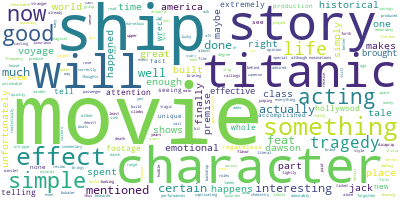

In [12]:
from IPython.display import Image  
Image('wc.png')

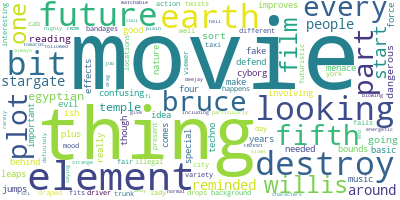

In [15]:
Image(generate_word_cloud(test_data[1]))